In [10]:
#Importing neccesary libaries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Loading the dataset

data = "C:\\Users\\HP\\Desktop\\CanadaRdata.csv"
table = pd.read_csv(data)

#Displaying the first 10 rows to inspect the data
table.head(10)

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70
5,2012,Egypt,597,239,836
6,2012,Argentina,258,19,277
7,2012,Armenia,200,36,236
8,2012,Australia,6,5,11
9,2012,Austria,0,5,5


Loading and viewing the dataset
We load the dataset and inspect its structure to understand its contents

In [12]:
#Trying to know more information about this data before moving forward to the exploration
table.describe() 

,Year,UNHCR-refugees,Asylum-seekers,total-count
count,1870.000000,1870.000000,1870.000000,1870.000000
mean,2016.955615,752.438503,323.139572,1075.578075
std,3.167123,2427.738942,1181.143362,2980.751399
min,2012.000000,0.000000,0.000000,0.000000
25%,2014.000000,20.000000,7.000000,39.250000
50%,2017.000000,124.000000,36.000000,187.000000
75%,2020.000000,563.750000,195.250000,889.750000
max,2022.000000,75098.000000,19765.000000,75294.000000


In [13]:
#Checking for missing values
table.isnull().sum()

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

In [14]:
#Checking the data types
table.dtypes

Year                  int64
Country-of-origin    object
UNHCR-refugees        int64
Asylum-seekers        int64
total-count           int64
dtype: object

DATA OVERVIEW
We check for missing values and confirm the data types to ensure the data is clean and readfy for analysis.

#EXPLORATORY DATA ANALYSIS 

Question 1: From which countries has Canada admitted the highest number of refugees

In [23]:
#Grouping by UNHCR-refugees to find the highest number of refugees 

highest_ad_C = table.groupby("Country-of-origin")["UNHCR-refugees"].max()
highest_ad_C=highest_ad_C.reset_index()

#sorting by UNHCR-refugee in desc order 
highest_ad_C.sort_values(by="UNHCR-refugees", inplace=True, ascending=False)


ab = highest_ad_C.head(10)
ab.head(10)

,Country-of-origin,UNHCR-refugees
170,Ukraine,75098
35,Colombia,17563
33,China,16813
152,Sri Lanka,13705
121,Pakistan,11605
117,Nigeria,10172
175,Unknown,10016
72,Haiti,8807
78,Iran (Islamic Rep. of),7134
168,Türkiye,7085


#Top Countries of origin
We identify the top 10 countires from which canada has admitted the highest number of refugees

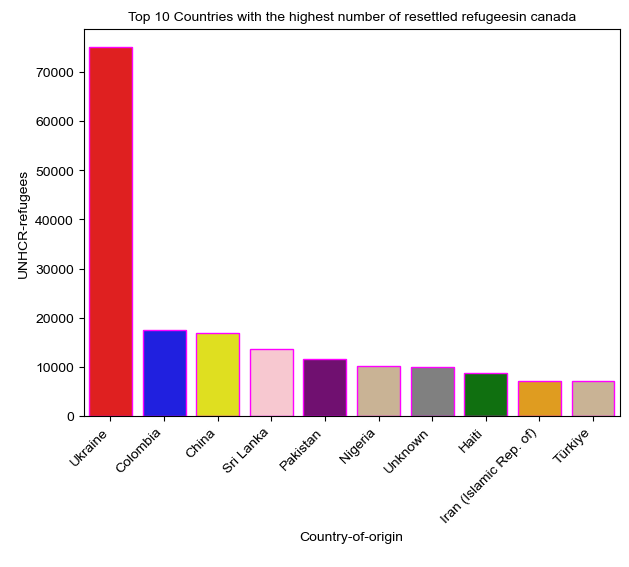

<Figure size 1000x600 with 0 Axes>

In [24]:
#Creating Seaborn Barchart for the top 10 Countries with the highest number of refugees

sns.barplot(data = ab, x= "Country-of-origin", y=  "UNHCR-refugees", palette= ["red","blue","yellow","pink","purple","tan","grey","green","orange","tan"],hue="Country-of-origin",edgecolor="magenta" )
plt.xlabel("Country-of-origin")
plt.ylabel("UNHCR-refugees")
plt.title("Top 10 Countries with the highest number of resettled refugeesin canada",fontsize=10)

#rotate x axis for better visibility and beautifying the plot
plt.tight_layout()
plt.xticks(rotation=45, ha = "right")
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

plt.show()

Question2. What's the total number of restteled refugees in canada per year


In [33]:
#Grouping by UNHCR-refugees to find total number of restteled refugees in canada per year

no_of_R = table.groupby("Year")["UNHCR-refugees"].sum().reset_index(name= "UNHCR-refugees")
no_of_R.sort_values(by = "UNHCR-refugees", inplace= True, ascending=False)
no_of_R.reset_index(drop=True,inplace=True)
no_of_R.head(10)

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2022,140621
4,2015,135890
5,2021,130125
6,2018,114101
7,2020,109214
8,2017,104768
9,2019,101757


Total Refugees Per Year

We calculated the total number of restteled refugees in canada per year to observe change over time 

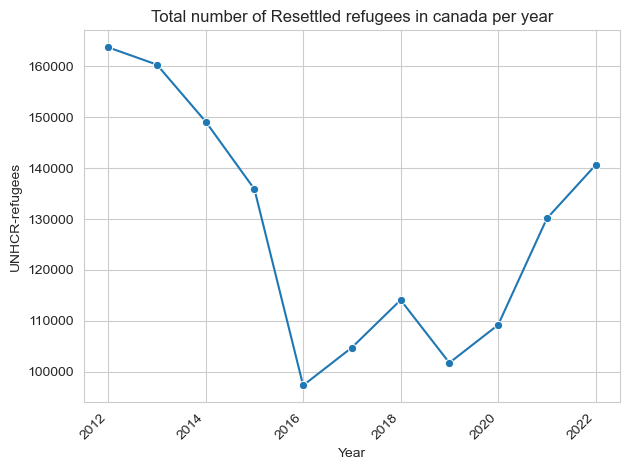

In [34]:
#Creating Seaborn Line plot to Visualize the total number of Resettled refugees in canada per year

sns.lineplot(data=no_of_R,x="Year", y= "UNHCR-refugees",marker="o")

plt.xlabel("Year")
plt.ylabel("UNHCR-refugees")
plt.title("Total number of Resettled refugees in canada per year")
plt.xticks(rotation=45,ha="right")
sns.set_style("whitegrid")
plt.grid
plt.tight_layout()
plt.show()

In [ ]:
Question 3.  What are the countries of origin for the majority of asylum claims made in canada

In [60]:
#Grouping by Asylum-seekers to find the countries of origin for the majority of asylum claims made in canada

country_of_origin = table.groupby("Country-of-origin")["Asylum-seekers"].sum().reset_index(name="Asylum-seekers")
country_of_origin.sort_values(by = "Asylum-seekers", inplace= True, ascending=False)
country_of_origin.reset_index(drop=True,inplace=True)

c_of_o =country_of_origin.head(10)
c_of_o.head(10)

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


In [ ]:
Country of Origin for most Asylum claims in canada

We calculated the top 10 total number of Asylum-seekers in canada per year 

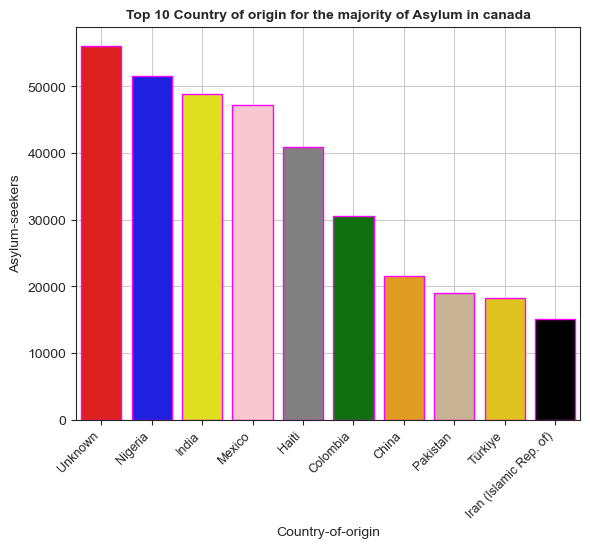

In [91]:
#Creating Seaborn bar plot to visualize the total number of Asylum-seekers in canada per year


sns.barplot(data=c_of_o, x="Country-of-origin", y="Asylum-seekers",palette= ["red","blue","yellow","pink","grey","green","orange","tan","gold","black"],hue = "Country-of-origin",edgecolor="magenta")
plt.title("Top 10 Country of origin for the majority of Asylum in canada",fontsize=10,fontweight="bold")
plt.xlabel("Country-of-origin")
plt.ylabel("Asylum-seekers")

#Beautifying the plot
plt.grid()
sns.set_style("ticks")

plt.tight_layout()
plt.xticks(rotation=45,ha="right",fontsize=9)
plt.show()


Question 4 :Total number of Asylum claims made in canada per year


In [77]:
#Grouping by Asylum-seekers to find the Total number of Asylum claims made in canada per year
no_of_A = table.groupby("Year")["Asylum-seekers"].sum()
no_of_A = no_of_A.reset_index()

no_of_A.sort_values(by = "Asylum-seekers", inplace= True, ascending=False)

no_of_A.head(10)

,Year,Asylum-seekers
10,2022,113066
7,2019,97017
8,2020,85352
6,2018,78766
9,2021,63143
5,2017,51859
0,2012,32647
4,2016,23946
1,2013,22145
3,2015,19631


Total Asylum-seekers Per Year

We calculated the top 10 total number of Asylum-seekers in canada per year 

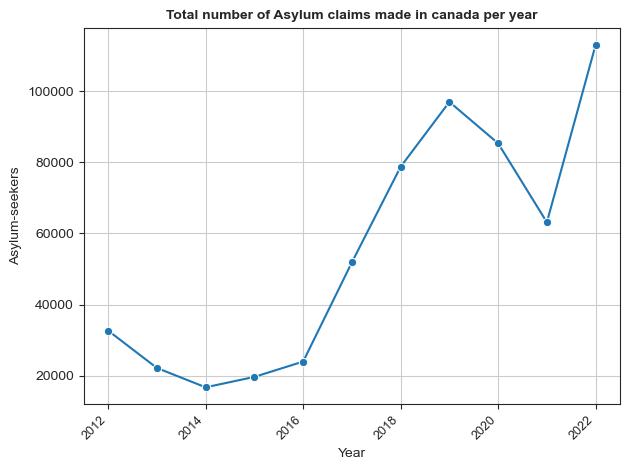

In [78]:
#Creating a line plot to visualize the total number of Asylum-seekers in canada per year

sns.lineplot(data=no_of_A,x="Year", y= "Asylum-seekers",marker="o")


plt.title("Total number of Asylum claims made in canada per year",fontsize=10,fontweight="bold")
plt.xticks(rotation=45,ha="right",fontsize=9)
sns.set_style("ticks")
plt.xlabel("Year")
plt.ylabel("Asylum-seekers")
plt.tight_layout()
plt.grid()
plt.show()


Question 5: what are the general trends in refugee and asylum statistics from 2012-2022

In [128]:
#Grouping by total-count to find the Countries with the highest overall count in canada

top_countries = table.groupby("Country-of-origin")["total-count"].sum().reset_index()
top_countries =top_countries.sort_values(by= "total-count",ascending=False)
top_countries= top_countries.head(10)
top_countries.head(10)


,Country-of-origin,total-count
35,Colombia,138891
33,China,120112
117,Nigeria,112174
72,Haiti,111864
106,Mexico,98218
121,Pakistan,93760
170,Ukraine,91182
76,India,81757
152,Sri Lanka,75102
175,Unknown,72545


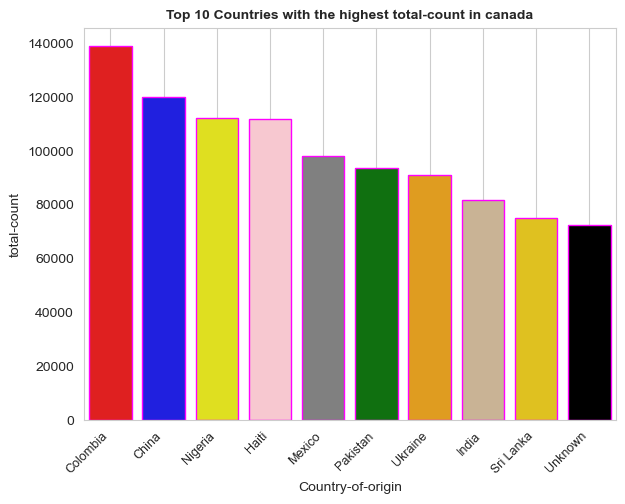

In [129]:
#Creating seaborn barplot to visualize the top ten countries with highest total count in canada

sns.barplot(data =top_countries,x="Country-of-origin" , y="total-count",palette= ["red","blue","yellow","pink","grey","green","orange","tan","gold","black"],hue = "Country-of-origin",edgecolor="magenta")

plt.title("Top 10 Countries with the highest total-count in canada",fontsize=10,fontweight="bold")
plt.xlabel("Country-of-origin")
plt.ylabel("total-count",fontsize=10)

plt.grid()
sns.set_style("ticks")
plt.tight_layout()
plt.xticks(rotation=45,ha="right",fontsize=9)
plt.show()

In [141]:
#Grouping by UNHCR-refugees & Asylum-seekers to find the General Trends  between UNHCR-refugees & Asylum-seekers per year
genTrend= table.groupby("Year")[["UNHCR-refugees","Asylum-seekers"]].sum().reset_index()
genTrend.head(10)

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


Seaborn Barplot comparing categories


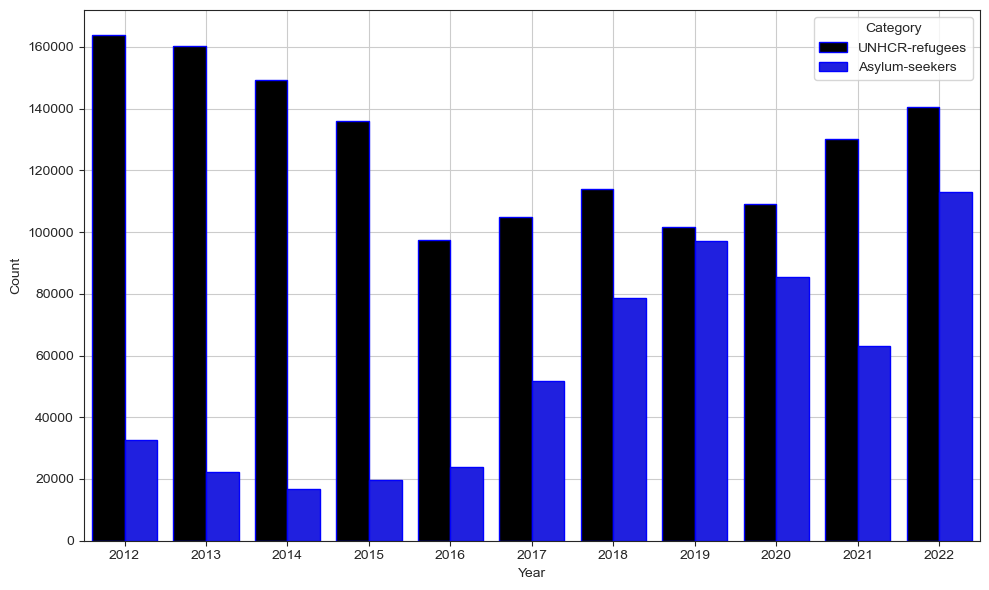

In [137]:
# Creating Seaborn for Comparing UNHCR-refugees and Asylum-seekers over time using Seaborn bar plots.


melt_data= pd.melt(genTrend, id_vars=['Year'], var_name='Category', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melt_data, x='Year', y='Count', hue='Category', palette= ["black","Blue"],edgecolor="blue")
plt.tight_layout()
plt.grid()
plt.show()

INSIGHTS AND SUMMARY BASED ON MY ANALYSIS:

Q1. Countries Admitted the Highest Number of UNHCR Refugees

Top 10 Countries of Origin:

1. Ukraine (75,098)

2. Colombia (17,563)

3. China (16,813)

4. Sri Lanka (13,705)

5. Pakistan (11,605)

6. Nigeria (10,172)

7. Unknown (10,016)

8. Haiti (8,807)

9. Iran (Islamic Rep. of) (7,134)

10. Türkiye (7,085)

Insight: Ukraine stands out due to the recent geopolitical crisis. Other countries like Sri Lanka, Pakistan, and Nigeria also have notable refugee admissions, indicating the need for humanitarian intervention.




Q2. Total Number of Resettled Refugees per Year in Canada

Top Years for Resettled Refugees:

2012: 163,751

2013: 160,347

2014: 149,164

2022: 140,621

2015: 135,890

Insight: The highest resettlement occurred between 2012-2015, with a peak again in 2022, likely due to increased global conflicts and displacement crises.





Q3. Countries of Origin for Asylum Claims in Canada

Top 10 Countries of Origin:

1. Unknown (56,098)

2. Nigeria (51,620)

3. India (48,806)

4. Mexico (47,146)

5. Haiti (40,908)

6. Colombia (30,475)

7. China (21,526)

8. Pakistan (19,023)

9. Türkiye (18,166)

10. Iran (Islamic Rep. of) (15,011)

Insight: Nigeria, India, and Mexico represent the largest identifiable groups of asylum seekers. Haiti and Colombia also contribute significantly, indicating political instability or economic challenges in these regions.




Q4. Total Number of Asylum Claims per Year

Top Years for Asylum Claims:

2022: 113,066

2019: 97,017

2020: 85,352

2018: 78,666

2021: 63,413

Insight: 2022 saw the highest number of asylum claims, possibly due to global political unrest and conflict. The numbers dipped slightly during the COVID-19 pandemic but rose again post-2020.


Q5 What are the general trends in refugee and asylum statistics from 2012-2022

1. Top Countries of Origin:

Colombia has the highest refugee count, followed by China and Nigeria.

Other notable countries include Haiti, Mexico, Pakistan, Ukraine, India, Sri Lanka, and an Unknown category.



2. Refugee Trends:

Peak Years: Most refugees came into Canada in 2012, 2013, and 2014. These years had the highest numbers.

Lowest Year: 2016 saw the lowest number of refugees.



3. Asylum Trends:

Peak Years: 2022 and 2019 had the highest asylum applications

Lowest Year: 2014 saw the fewest asylum applications.



2. General Trends:
There seems to be a concentration of refugees from South America, Asia, and Africa, indicating possible social, political, or economic instability in those regions during the period.

The presence of an Unknown category suggests incomplete or undocumented data for some cases.




Insights and Overall Summary:
Top Countries: Most refugees and asylum seekers came from Colombia, China, Nigeria, Haiti, and Ukraine.
Unknown Origin: Some records didn’t show the country of origin, meaning the data wasn’t complete.
Key Factors: The numbers changed based on global conflicts and Canada’s policies on refugees and asylum seekers.



About the project:
This project shows how global events and Canadian immigration policies affected the flow of refugees and asylum seekers from 2012 to 2022.